# Cvičení 8

Stále pokračujeme v iteračním řešení soustav lineárních rovnic.

## Metoda největšího spádu

V tomto cvičení budeme řešit soustavu $\mathsf{A}\mathbf{x}=\mathbf{b}$ se symetrickou pozitivně definitní maticí pomocí metody největšího spádu.

### Příklad 1

Doplňte správné řešení Metody největšího spádu (anlicky Steepest Descent method) do buňky níže dle algoritmu z přednášek: 


$$
\begin{array}{l}
\text{Input: SPD matrix } A, \text{ right-hand side vector } b, \text{ initial approximation } x_0, \epsilon \in (0,1), \text{ maximum number of iterations max\_it.}\\
k = 0  \\
r^0 := b - Ax^0 \\
\text{\bf{while} } ||r^k||_A/||r^0||_A > \epsilon \\
\quad\begin{array}{l}
    \alpha_k := ||r^k||^2/||r^k||^2_A \\
    x^{k+1} := x^k + \alpha_k r^k \\ 
    r^{k+1} := b - Ax^{k+1} \\
    k = k + 1 \\
\end{array}\\
\text{end while}\\
\text{The solution is stored in } x^{k}.\\
\end{array}
$$

Zde podmínku $||r^k||_A/||r^0||_A$ můžeme rozepsat jako 
$$ \frac{||r^k||_A}{||r^0||_A} = \frac{\sqrt{(r^k)^TAr^k}}{\sqrt{(r^0)^TAr^0}} $$ 

a $\alpha_k := ||r^k||^2/||r^k||^2_A$ jako 
$$ \alpha_k := \frac{||r^k||^2}{||r^k||^2_A} = \frac{(r^k)^T r^k}{(r^k)^T A r^k} $$ 
(vztahy na pravé straně jsou vhodnější pro implementaci).

In [ ]:
# Zavolejte tuto bunku, cimz vytvorime nahodnou symetrickou pozitivne definitni matici

import numpy as np

np.random.seed(42)  # Nastavíme seed pro generátor náhodných čísel, abychom vždy dostali stejnou matici

n = 10
U = np.triu(np.random.rand(n, n), 1)
d = 100 * np.random.rand(n, 1)
A = np.diag(d.flatten()) + U + U.T  # matice soustavy
b = np.random.rand(n, 1)            # vektor prave strany
x0 = np.zeros((n, 1))               # pocatecni odhad reseni

In [2]:
def steepest_descent(A, b, x0, tol, max_it):
    """
    Resi system Ax=b s SPD matici A.
    A: matice soustavy
    b: vektor prave strany
    x0: pocatecni odhad
    tol: relativni presnost
    max_it: maximalni pocet iteraci
    """

    # citac iteraci
    k = 0

    # vektor pocatecniho rezidua
    x = x0
    r = r0 = b - A @ x
    
    # vytvorime pole, do ktereho budeme ukladat normy rezidua v jednotlivych iteracich
    # (pro vykreslení grafu v Příkladu 2)   
    residuals = [np.linalg.norm(r)]

    # hlavni smycka
    while (np.sqrt(r.T @ A @ r) / np.sqrt(r0.T @ A @ r0) > tol) and k < max_it:
        # vypocet alpha_k
        alfa = (r.T @ r) / (r.T @ A @ r)
        
        # vypocet x_{k+1}
        x = x + alfa * r

        # vypocet r_{k+1}
        r = b - A @ x

        # navysime citac iteraci
        k += 1

        # ulozime reziduum
        residuals.append(np.linalg.norm(r))

    return x, k, residuals

In [7]:
# Zavolame vami upravenou funkci:
x, k, _ = steepest_descent(A, b, x0, 1e-12, 1000)

# Otestujeme, zda je reseni v poradku
x_python = np.linalg.solve(A, b)
n = np.linalg.norm(x - x_python)

if n < 1e-8:
    print("Vase funkce steepestDescent pravdepodobne pracuje spravne.\n")
else:
    print("Ve funkci steepestDescent nejspis chyba.\n")

Vase funkce steepestDescent pravdepodobne pracuje spravne.



### Příklad 2

Pomocí Vaší metody steepest_descent() vyřešte soustavu s různou přesností, zapište počty iterací a pro největší přesnost vykreslete graf (normy) rezidua v závislosti na iteraci. 

Pocty iteraci metody nejvetsiho spadu: 
[41, 109, 245]


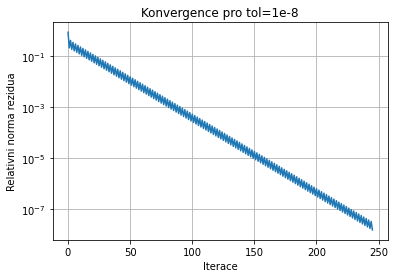

In [ ]:
# Priklad 2
# Pomoci metody steepest_descent() vyreste soustavu s ruznou presnosti.
# Zapiste pocty iteraci potrebne k dosazeni dane presnosti do tabulky:
x, k1, _ = steepest_descent(A, b, x0, 0.01, 2000)
x, k2, _ = steepest_descent(A, b, x0, 0.0001, 2000)
x, k3, residuals = steepest_descent(A, b, x0, 1e-8, 2000)

print("Pocty iteraci metody nejvetsiho spadu: ")
print([k1, k2, k3])

# Doplnte tabulku
# Metoda nejvetsiho spadu:
# tol = 0.01,   k = 41
# tol = 0.0001, k = 109
# tol = 1e-8,   k = 245

# Nakonec vykreslime graf normy rezidua v zavislosti na iteraci do 
# semilogaritmickeho grafu
import matplotlib.pyplot as plt
plt.semilogy(range(k3+1), residuals)
plt.xlabel('Iterace')
plt.ylabel('Relativni norma rezidua')
plt.title('Konvergence pro tol=1e-8')
plt.grid(True)
plt.show()